# 1) Create a SL problem (with appropriate shift of your choice) - Justify in text

Time series problem can be used as Supervised learning by reconstructing the value at the previous time step to predict the values  at the next time step. As Supervised learning needs and input X and an output u, to map function from input to output

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [77]:
shamdf=pd.read_csv("shampoo-sales.csv",index_col=0, parse_dates=True)

In [7]:
shamdf.head()

,Date,Sales
0,1/1/2001,266.0
1,2/1/2001,145.9
2,3/1/2001,183.1
3,4/1/2001,119.3
4,5/1/2001,180.3


In [80]:
shifted=shamdf.shift(1)
shifted.head()

,Sales
Date,
2001-01-01,NaN
2001-02-01,266.0
2001-03-01,145.9
2001-04-01,183.1
2001-05-01,119.3


In [79]:
temps = pd.DataFrame(shamdf.values)
df = pd.concat([temps.shift(1), temps], axis=1)
df.columns = ['t', 't+1']
df.head(5)

,t,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


In [8]:
shamdf.dtypes

Date      object
Sales    float64
dtype: object

In [9]:
shamdf['Date']=pd.to_datetime(shamdf['Date'])

In [10]:
shamdf.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

# 2 Fill out any missing values (if any) - remember the method for filling in missing values is different for TSF data

In this dataset there is not missing values

In [11]:
#checking missing values
shamdf.isnull().sum()

Date     0
Sales    0
dtype: int64

In [14]:
shamdf['Year']=shamdf.index.year

In [15]:
shamdf.head()

,Sales,Year
Date,,
2001-01-01,266.0,2001
2001-02-01,145.9,2001
2001-03-01,183.1,2001
2001-04-01,119.3,2001
2001-05-01,180.3,2001


# Upsampling dataset
as the size of the dataset is very small. It only contains 39 rows

In [26]:
upsampled = shamdf.resample('D').mean()
print(upsampled.head(32))

            Sales    Year
Date                     
2001-01-01  266.0  2001.0
2001-01-02    NaN     NaN
2001-01-03    NaN     NaN
2001-01-04    NaN     NaN
2001-01-05    NaN     NaN
2001-01-06    NaN     NaN
2001-01-07    NaN     NaN
2001-01-08    NaN     NaN
2001-01-09    NaN     NaN
2001-01-10    NaN     NaN
2001-01-11    NaN     NaN
2001-01-12    NaN     NaN
2001-01-13    NaN     NaN
2001-01-14    NaN     NaN
2001-01-15    NaN     NaN
2001-01-16    NaN     NaN
2001-01-17    NaN     NaN
2001-01-18    NaN     NaN
2001-01-19    NaN     NaN
2001-01-20    NaN     NaN
2001-01-21    NaN     NaN
2001-01-22    NaN     NaN
2001-01-23    NaN     NaN
2001-01-24    NaN     NaN
2001-01-25    NaN     NaN
2001-01-26    NaN     NaN
2001-01-27    NaN     NaN
2001-01-28    NaN     NaN
2001-01-29    NaN     NaN
2001-01-30    NaN     NaN
2001-01-31    NaN     NaN
2001-02-01  145.9  2001.0


                 Sales    Year
Date                          
2001-01-01  266.000000  2001.0
2001-01-02  262.125806  2001.0
2001-01-03  258.251613  2001.0
2001-01-04  254.377419  2001.0
2001-01-05  250.503226  2001.0
2001-01-06  246.629032  2001.0
2001-01-07  242.754839  2001.0
2001-01-08  238.880645  2001.0
2001-01-09  235.006452  2001.0
2001-01-10  231.132258  2001.0
2001-01-11  227.258065  2001.0
2001-01-12  223.383871  2001.0
2001-01-13  219.509677  2001.0
2001-01-14  215.635484  2001.0
2001-01-15  211.761290  2001.0
2001-01-16  207.887097  2001.0
2001-01-17  204.012903  2001.0
2001-01-18  200.138710  2001.0
2001-01-19  196.264516  2001.0
2001-01-20  192.390323  2001.0
2001-01-21  188.516129  2001.0
2001-01-22  184.641935  2001.0
2001-01-23  180.767742  2001.0
2001-01-24  176.893548  2001.0
2001-01-25  173.019355  2001.0
2001-01-26  169.145161  2001.0
2001-01-27  165.270968  2001.0
2001-01-28  161.396774  2001.0
2001-01-29  157.522581  2001.0
2001-01-30  153.648387  2001.0
2001-01-

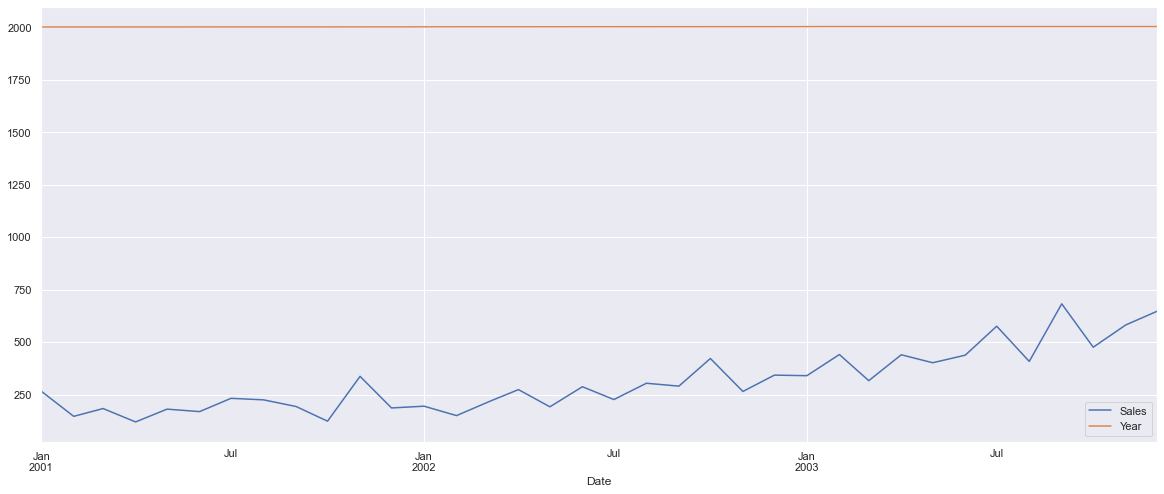

In [27]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

# 3 plot the time series and make any observations regarding cyclic trends, white noise, and random walk (if the series is not white noise or random walk, explain why it is not)

Dataset shows trends, which is increasing and some seasonality too, there is no cycle in dataset. There is also no white noise as if trend exists any dataset so there would be no white noise and mean will be non-zero and their variance will not be same. No random walks here as data contains large jumps, as in random walk data doesn't contain large jumps.

<AxesSubplot:xlabel='Date'>

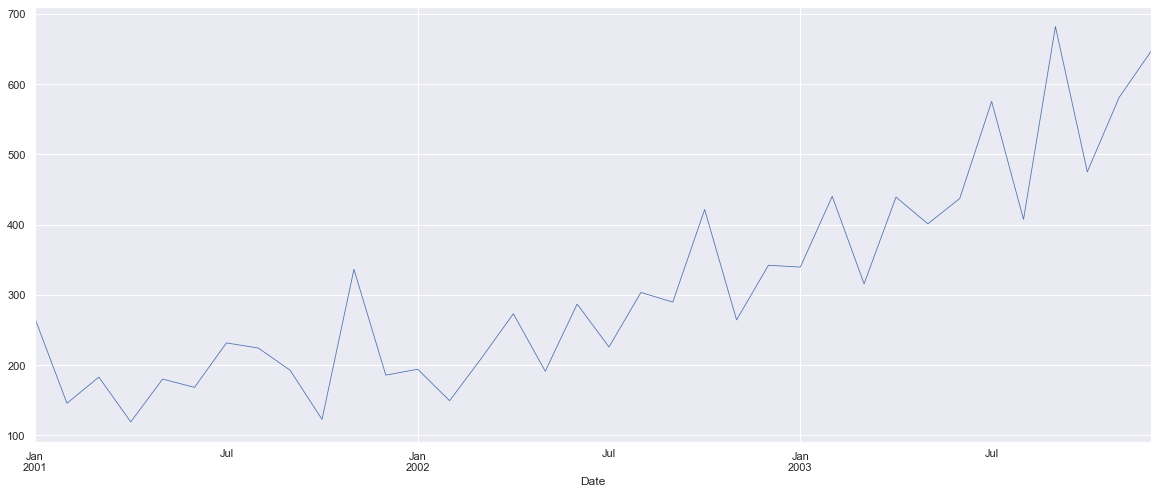

In [16]:
sns.set(rc={'figure.figsize':(20,8)})
shamdf['Sales'].plot(linewidth=0.8)

# 4. Seasonally decompose and interpret thorougly with respect to seasonality, trend, and residuals

In [19]:
shamdf.sort_index(inplace=True)

From this below seasonal _decompose, There is a clear seasonal pattren which repeats itself every quarter. as size of dataset is very small. from above simple graph it was unable to detect seasonality in it.  It also shows an increasing trend and residuals in dataset.

<ipython-input-29-c3c9c5ae0afd>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(shamdf['Sales'], model='additive', freq=3)


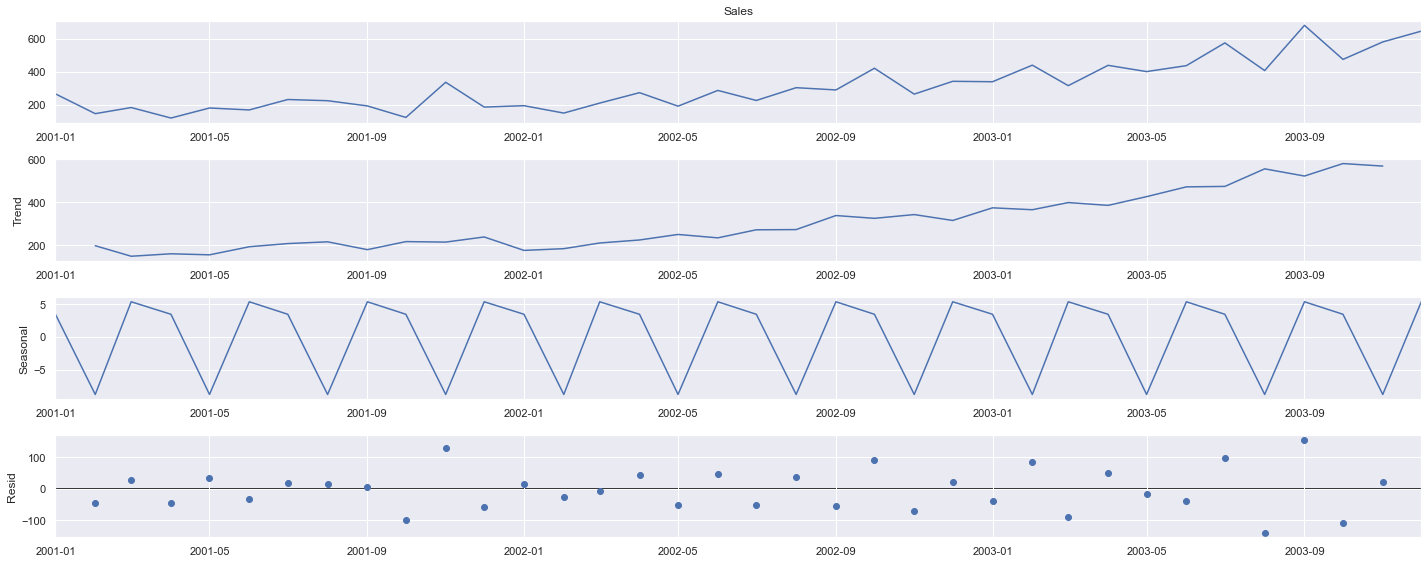

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(shamdf['Sales'], model='additive', freq=3)
result.plot()
plt.show()

# 5) Is there a need to apply differencing on the series? Why or why not?
As time series is not stationary so there is a need to apply differencing in series

# 6) If yes in 5), then apply differencing - did you apply order 1 or order 2? Why or why not? Interpret the results and prove stationarity through Dickey-Fuller

Yes, I have applied differencing of order 1. As by applying order 1, here in below graph, it shows time is independent and mean is closer to zero. so dont need to apply order 2.

In [81]:
#using statistical measures (its not stationary)
X=df.values
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1, mean2=X1.mean(),X2.mean()
var1, var2= X1.var(),X2.var()
print('mean1=%f,mean2=%f'%(mean1,mean2))
print('var1=%f,var2=%f'%(var1,var2))

mean1=nan,mean2=411.697222
var1=nan,var2=15136.461937


In [86]:
#dickey Fuller test
#this test proves that data is not stationary as the value of Statistic is 3 which is greater than all critical values.
copy=pd.read_csv("shampoo-sales.csv",index_col=0, parse_dates=True)
X=copy.values
result=adfuller(X)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value : 1.000000
 Citical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


# Differencing

In [87]:
diff=list()

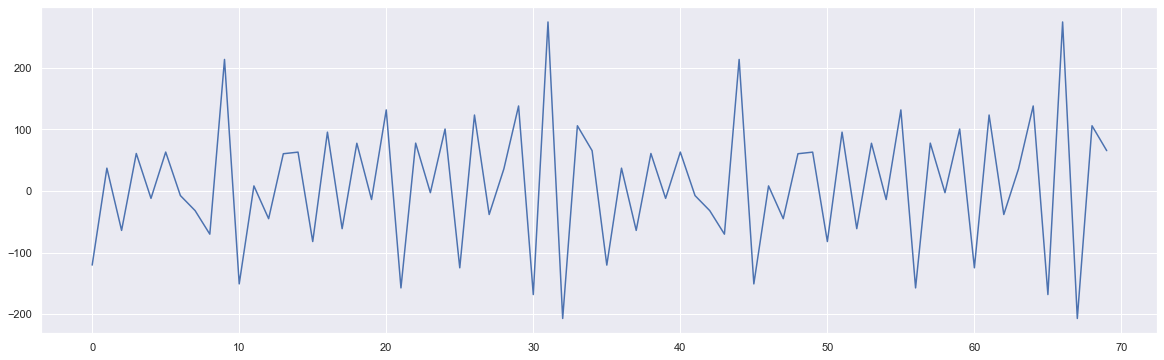

In [128]:
X=copy.values
for i in range(1, len(X)):
    value = X[i] - X[i -1]
    diff.append(value)

plt.figure(figsize=(20,6))
plt.plot(diff)
plt.show()

In [43]:
result=adfuller(diff)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.233267
p-value : 0.194394
 Citical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579


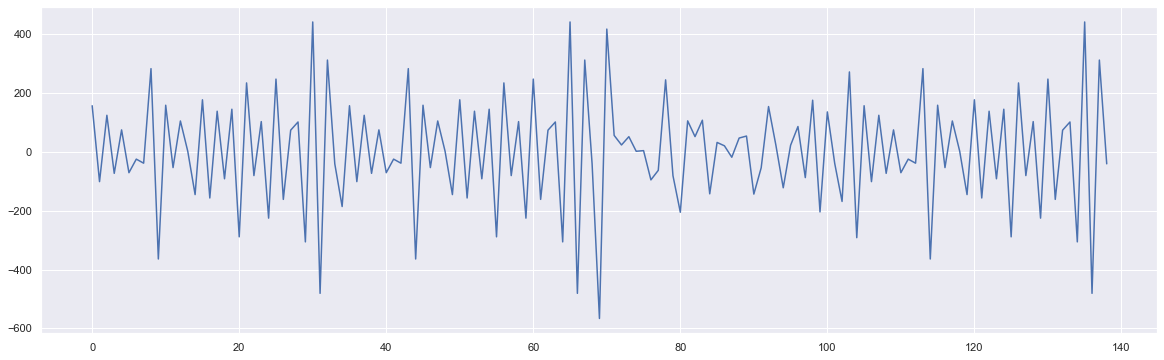

In [44]:
diff2=list()
for i in range(1, len(diff)):
    value = diff[i] - diff[i - 1]
    diff2.append(value)

plt.figure(figsize=(20,6))
plt.plot(diff2)
plt.show()

# 7) Generate forecasts with persistence model. Put comments in text for explanation.

The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the next time step (t+1). 
The plot generated the forcast which shows the both expected and predicted values are mostly closed.

In [89]:
X=df.values

In [90]:
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [91]:
len(test)

7

Persistence Algorithm

In [92]:
# persistence model
def model_persistence(x):
    return x

Make and Evaluate Forecast

In [93]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 161.300


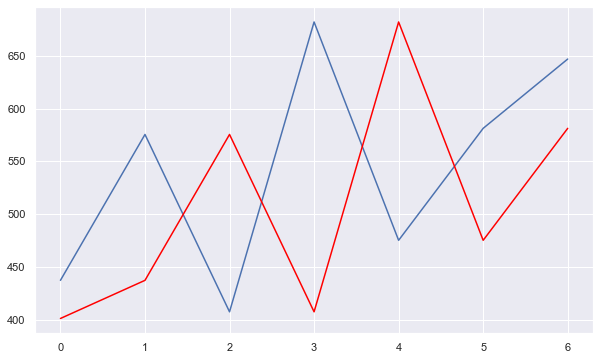

In [94]:
# plot predictions vs expected
plt.figure(figsize=(10,6))
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

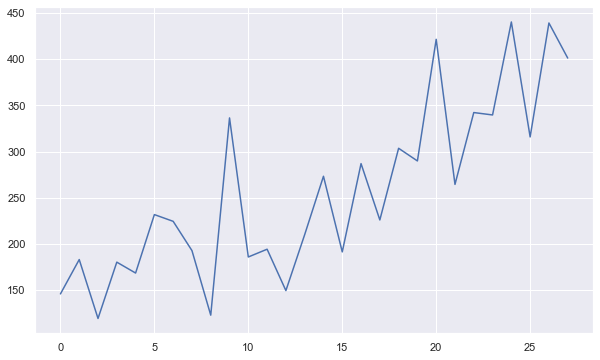

In [95]:
# plot predictions and expected results
plt.figure(figsize=(10,6))
plt.plot(train_y)
plt.show()

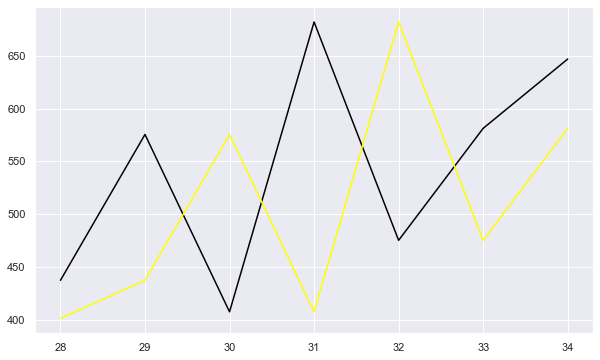

In [96]:
# plot predictions and expected results
plt.figure(figsize=(10,6))
plt.plot([None for i in train_y] + [x for x in test_y],color='black')
plt.plot([None for i in train_y] + [x for x in predictions],color='yellow')
plt.show()

# 8) Apply AR model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation. Interpret thoroughly,  the model outputs.

Here it shows the autocorrelation at different lags. It seems like the correlation is very weak.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


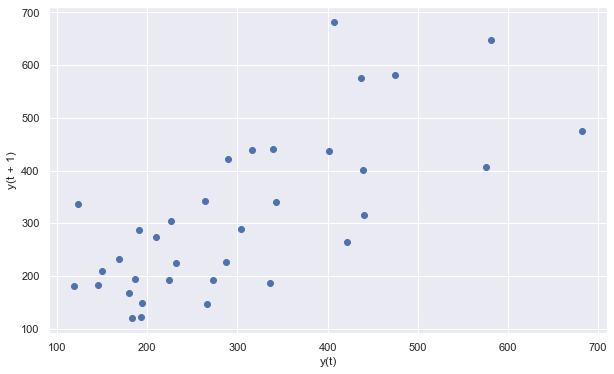

In [121]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(copy)
plt.show()

On x-axis we have lags (5 time step) and on y-axis we have correlation. and all lags from start to 5 are above confidence level. and from 15 to 35 lags are between confidence level.

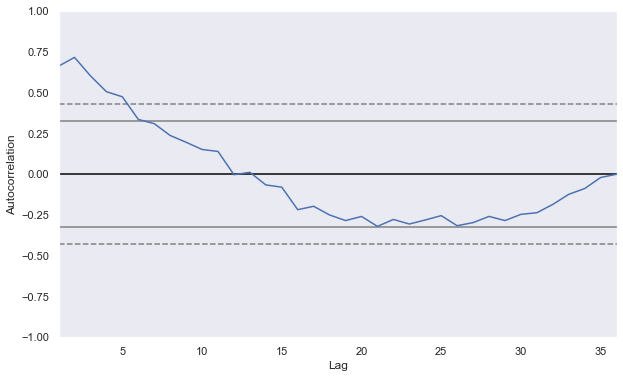

In [124]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
lags=5
autocorrelation_plot(copy)
plt.show()

lag zero which shows the current time step and dark area shows the save ranges here. From 1 to 11 shows the significant positivi correlation and lag 12 and 13 show no correlation and rest shows the negative correlation.

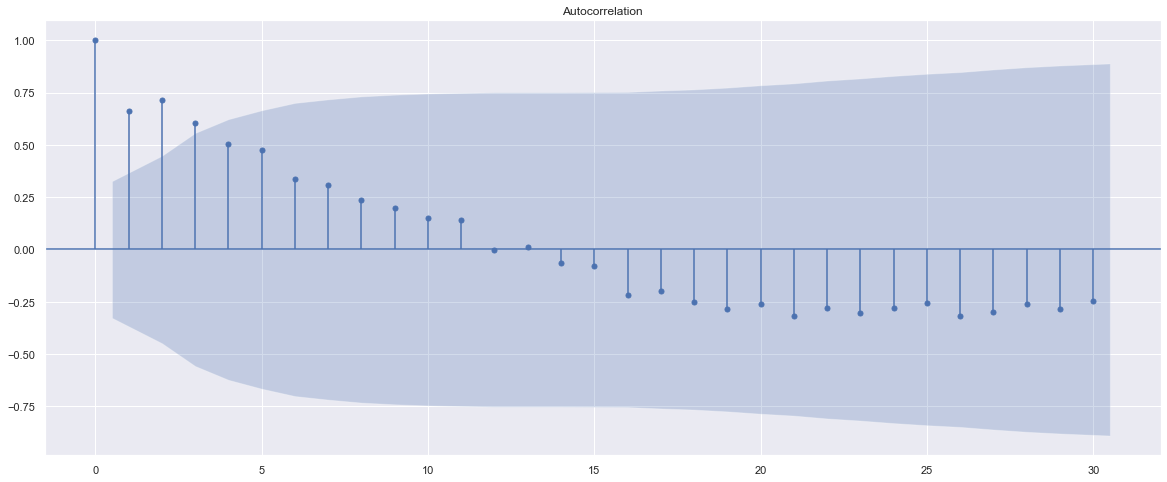

In [125]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(copy, lags=30)
plt.show()

AR Model

As the autocorrelation is very weak. It has taken 9 lags by default and we can see that there is a difference between in predicted and expected values, so the fit is not good enough here.

In [98]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
X = copy.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
window = model_fit.k_ar
coef = model_fit.params
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Lag: 9
Coefficients: [ 1.42133830e+01 -1.80428030e-01  3.50838213e-01  2.80941304e-01
  6.86078535e-01  2.34257235e-01 -1.61439527e-02 -7.88328088e-02
 -2.17194702e-01  1.17047869e-02]
predicted=451.852947, expected=437.400000
predicted=431.812599, expected=575.500000
predicted=477.828341, expected=407.600000
predicted=475.080458, expected=682.000000
predicted=497.792271, expected=475.300000
predicted=522.856138, expected=581.300000
predicted=526.326358, expected=646.900000
Test RMSE: 111.523


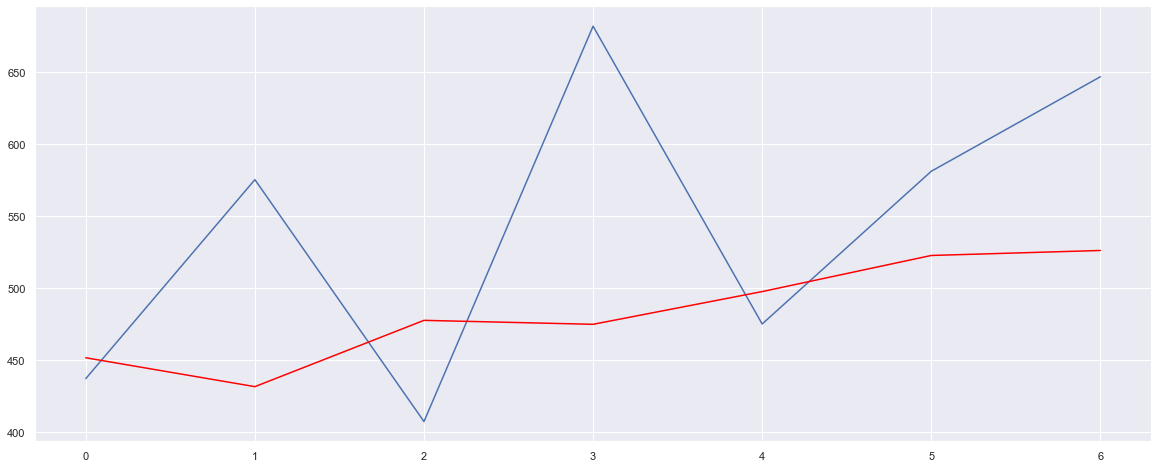

In [61]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 9) Apply MA model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation. Interpret thoroughly, the model outputs.

MA is basically related to the errors. As for the current time step, we will be getting errors at each iteration. So if we start to forecast the error values. AR can be used to correct the forecasting of our TS. We use predicted errors to make our current forecast better by using MA.

In [71]:
# walk forward over time steps in test
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]

In below graph the red line is from MA model and blue line we get from AR. Red line shows the basic error forecast to change the the yhat values, So that our prediction can adjust with errors.

predicted error=1722.529107, expected error=1565.600000
predicted error=1739.945594, expected error=1427.500000
predicted error=1727.454617, expected error=1595.400000
predicted error=1639.967663, expected error=1321.000000
predicted error=1707.810319, expected error=1527.700000
predicted error=1499.106838, expected error=1421.700000
predicted error=1622.348058, expected error=1356.100000
Test RMSE: 223.845


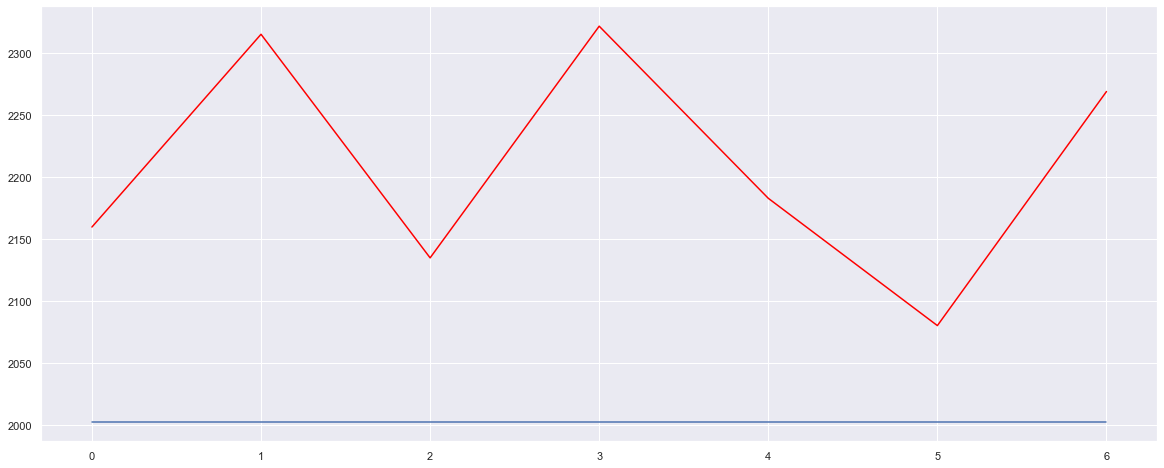

In [72]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

# 10) Apply ARIMA model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation.Interpret thoroughly the model outputs.

    Here we have set lag value 5, difference order 1 and MA = 0. and first graph shows the residual with some trends and other graph is density plot, shows some errors are not on zero.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 25 Apr 2021   AIC                            406.340
Time:                        18:51:14   BIC                            417.227
Sample:                    02-01-2001   HQIC                           410.098
                         - 12-01-2003                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

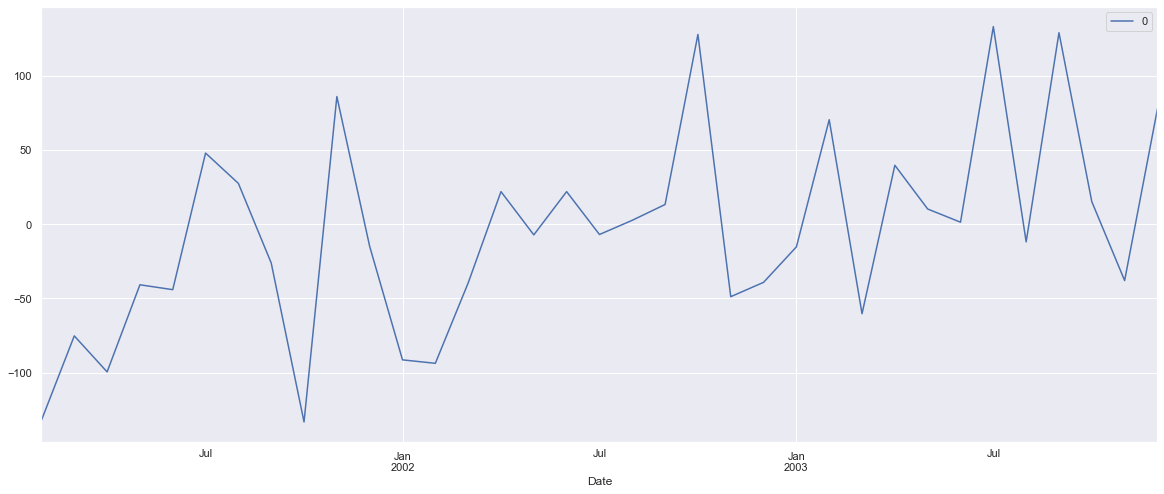

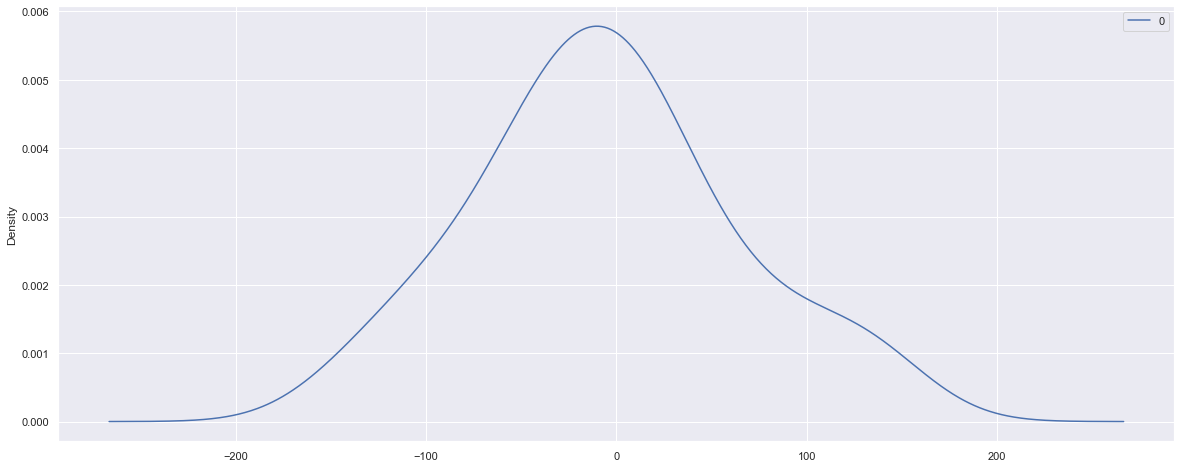

MSE:  111.52338897989456
                0
count   35.000000
mean    -5.495195
std     68.132883
min   -133.296603
25%    -42.477848
50%     -7.186507
75%     24.748377
max    133.238010


In [145]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(copy, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
rmse = sqrt(mean_squared_error(test_y, predictions))
print("MSE: ", rmse)
print(residuals.describe())

# 11) How do ARIMA, MA and AR compare with baseline? How do they compare with each other? Which approach is the best?

Here we have used persistence algorithm as baseline. so we can compared them on MSE results here. So the MSE of baseline is 161, means the error is more than 161 over the test dataset.
AR MSE = 111
MA MSE = 223
ARIMA MSE = 111
Here AR and ARIMA can be best approach for this dataset.